<a href="https://colab.research.google.com/github/11pujitha/11pujitha/blob/main/pcos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import zipfile

In [ ]:
dataset_path = '/content/drive/MyDrive/data'

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/data/train'

number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])

 infected  781
 notinfected  1143


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImage1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function= preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
def preprocessionfImage2(path):
  """
  Input :path
  Output : preprocessed Image
  """
  image_data  = ImageDataGenerator(preprocessing_function= preprocess_input )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [ ]:
def datafolder(path,split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split * number_of_images[dir])-5),replace=False):

          O = os.path.join(ROOT_DIR,dir,img)
          D = os.path.join("./"+path,dir)
          shutil.copy(O,D)
          os.remove(O)

  else:
     print("Folder already exist")

In [ ]:
datafolder("train",0.7)
datafolder("val",0.15)
datafolder("test",0.15)

Folder already exist
Folder already exist
Folder already exist


In [ ]:
path ='/content/train'
train_data = preprocessingImage1(path)

Found 1336 images belonging to 2 classes.


In [ ]:
path ='/content/test'
test_data = preprocessionfImage2(path)

Found 198 images belonging to 2 classes.


In [ ]:
path = '/content/val'
val_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x= Flatten()(base_model.output)
x= Dense(units=1,activation='sigmoid')(x)

In [ ]:
model = Model(base_model.input,x)

In [ ]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)

#Early check points
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1)

cb = [mc,es]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=16,
                          callbacks=cb)

<ipython-input-48-0bed7b29e770>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.5974e-05 - accuracy: 1.0000


Epoch 1: val_accuracy did not improve from 1.00000
10/10 [==============================] - 40s 4s/step - loss: 1.5974e-05 - accuracy: 1.0000 - val_loss: 1.3393e-06 - val_accuracy: 1.0000
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 8.9295e-05 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 8.9295e-05 - accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.6545e-05 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 8.6545e-05 - accuracy: 1.0000
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 2.7928e-06 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 2.7928e-06 - accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 8.4879e-05 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 8.4879e-05 - accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 1.9677e-07 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.9677e-07 - accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 1.1669e-06 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 1.1669e-06 - accuracy: 1.0000
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 5.1305e-07 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 5.1305e-07 - accuracy: 1.0000
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 1.9845e-05 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.9845e-05 - accuracy: 1.0000
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 1.5916e-07 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 1.5916e-07 - accuracy: 1.0000
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 4.5733e-06 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 4.5733e-06 - accuracy: 1.0000
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 7.7252e-07 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 7.7252e-07 - accuracy: 1.0000
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 1.1222 - accuracy: 0.9438

10/10 [==============================] - 18s 2s/step - loss: 1.1222 - accuracy: 0.9438
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 2.7939e-04 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 2.7939e-04 - accuracy: 1.0000
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9969

10/10 [==============================] - 20s 2s/step - loss: 0.0055 - accuracy: 0.9969
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 7.3121e-11 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 7.3121e-11 - accuracy: 1.0000
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 5.9737e-10 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 5.9737e-10 - accuracy: 1.0000
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 1.6711e-09 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.6711e-09 - accuracy: 1.0000
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 7.4219e-09 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 7.4219e-09 - accuracy: 1.0000
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 9.0502e-10 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 9.0502e-10 - accuracy: 1.0000
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 7.3745e-09 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 7.3745e-09 - accuracy: 1.0000
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 5.7779e-09 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 5.7779e-09 - accuracy: 1.0000
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 7.3796e-08 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 7.3796e-08 - accuracy: 1.0000
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 1.4859e-10 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 1.4859e-10 - accuracy: 1.0000
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 1.4807e-09 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.4807e-09 - accuracy: 1.0000
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 1.4006e-09 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 1.4006e-09 - accuracy: 1.0000
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 1.2700e-09 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.2700e-09 - accuracy: 1.0000
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 2.1982e-09 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 2.1982e-09 - accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 2.9267e-09 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 2.9267e-09 - accuracy: 1.0000
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 2.0983e-07 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 2.0983e-07 - accuracy: 1.0000


In [ ]:
model = load_model("/content/bestmodel.h5")

In [ ]:
acc = model.evaluate(test_data)[1]
print(f"our model accuracy is {acc * 100} %")

loss : 5.5316
our model accuracy is 94.81 %


In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf


def predictimage(path):

      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("Not Affected")
      else :
         print("Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

In [ ]:
import os

directory = "/content/drive/MyDrive/data/train/infected/"
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print("Image file found:", filename)
    else:
        print("Non-image file found:", filename)


Image file found: img_0_1725.jpg
Image file found: img_0_2357.jpg
Image file found: img_0_2439.jpg
Image file found: img_0_2546.jpg
Image file found: img_0_2794.jpg
Image file found: img_0_3515.jpg
Image file found: img_0_4375.jpg
Image file found: img_0_492.jpg
Image file found: img_0_6167.jpg
Image file found: img_0_6744.jpg
Image file found: img_0_7552.jpg
Image file found: img_0_764.jpg
Image file found: img_0_8045.jpg
Image file found: img_0_8449.jpg
Image file found: img_0_87.jpg
Image file found: img_0_9742.jpg


In [ ]:
import os

directory = "/content/drive/MyDrive/data/train/notinfected/"
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print("Image file found:", filename)
    else:
        print("Non-image file found:", filename)

Image file found: img_0_2164.jpg
Image file found: img_0_2136.jpg
Image file found: img_0_2203.jpg
Image file found: img_0_2479.jpg
Image file found: img_0_239.jpg
Image file found: img_0_2422.jpg
Image file found: img_0_254.jpg
Image file found: img_0_2571.jpg
Image file found: img_0_294.jpg
Image file found: img_0_2997.jpg
Image file found: img_0_3023.jpg
Image file found: img_0_3154.jpg
Image file found: img_0_3321.jpg
Image file found: img_0_3407.jpg
Image file found: img_0_3442.jpg
Image file found: img_0_3611.jpg
Image file found: img_0_393.jpg
Image file found: img_0_4381.jpg
Image file found: img_0_445.jpg
Image file found: img_0_4449.jpg
Image file found: img_0_4901.jpg
Image file found: img_0_4904.jpg
Image file found: img_0_5091.jpg
Image file found: img_0_4990.jpg
Image file found: img_0_5150.jpg
Image file found: img_0_5203.jpg
Image file found: img_0_5135.jpg
Image file found: img_0_5272.jpg
Image file found: img_0_5379.jpg
Image file found: img_0_5368.jpg
Image file foun

1/1 [==============================] - 1s 834ms/step
Affected


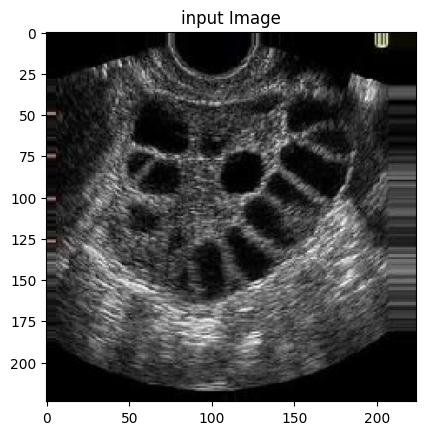

In [ ]:
#It is the infected image sample
predictimage("/content/drive/MyDrive/data/train/infected/img_0_2357.jpg")

1/1 [==============================] - 0s 274ms/step
Not Affected


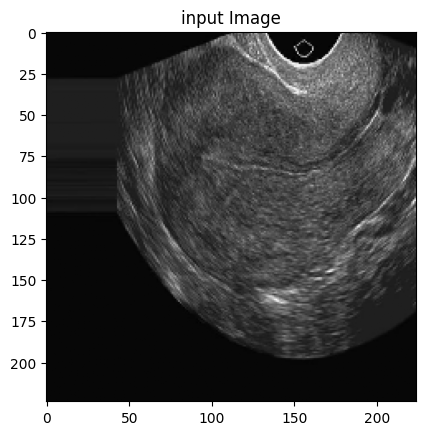

In [ ]:
#It is the not affected sample images
predictimage("/content/drive/MyDrive/data/train/notinfected/img_0_6858.jpg")

1/1 [==============================] - 0s 51ms/step
Not Affected


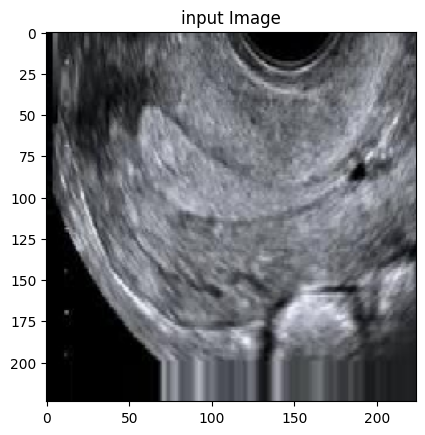

In [ ]:
#not infected image
predictimage("/content/drive/MyDrive/data/train/notinfected/img_0_1772.jpg")

1/1 [==============================] - 0s 102ms/step
Affected


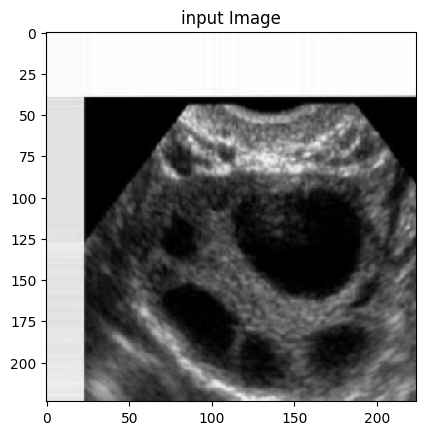

In [ ]:
#infected image
predictimage("/content/drive/MyDrive/data/train/infected/img_0_764.jpg")

In [ ]:
#ResNet50
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import preprocess_input
from keras.layers import Flatten,Dense
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
dataset_path = '/content/drive/MyDrive/data'

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/data/test'
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
   print("", dir, "", number_of_images[dir])

 infected  797
 notinfected  1145


In [ ]:
def preprocessing_image(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='binary')
  return image

In [ ]:
def data_folder(path, split):
  if not os.path.exists("./" + path):
    os.mkdir("./" + path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./" + path + "/" + dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size=(math.floor(split * number_of_images[dir])-5), replace=False):
          O = os.path.join(ROOT_DIR, dir, img)
          D = os.path.join("./" + path, dir)
          shutil.copy(O, D)
          os.remove(O)
  else:
    print("Folder already exists")

In [ ]:
data_folder("train", 0.7)
data_folder("val", 0.15)
data_folder("test", 0.15)

Folder already exists
Folder already exists
Folder already exists


In [ ]:
path = '/content/train'
train_data = preprocessing_image(path)

Found 1336 images belonging to 2 classes.


In [ ]:
path = '/content/val'
val_data = preprocessing_image(path)

Found 278 images belonging to 2 classes.


In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=1, activation='sigmoid')(x)
model = Model(base_model.input, x)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
mc = ModelCheckpoint(filepath="bestmodel_resnet.h5", monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1)
cb = [mc, es]

In [ ]:
hist = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cb)


<ipython-input-91-d83174d3670c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cb)


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.2783 - accuracy: 0.9219


Epoch 1: val_accuracy improved from -inf to 0.98201, saving model to bestmodel_resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 139s 14s/step - loss: 0.2783 - accuracy: 0.9219 - val_loss: 0.2363 - val_accuracy: 0.9820
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 2.4233e-04 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 2.4233e-04 - accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.6280 - accuracy: 0.8938

10/10 [==============================] - 58s 6s/step - loss: 2.6280 - accuracy: 0.8938
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9969

10/10 [==============================] - 58s 6s/step - loss: 0.0439 - accuracy: 0.9969
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 3.2669e-09 - accuracy: 1.0000

10/10 [==============================] - 57s 6s/step - loss: 3.2669e-09 - accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 9.6276e-09 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 9.6276e-09 - accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 2.0041e-08 - accuracy: 1.0000

10/10 [==============================] - 60s 6s/step - loss: 2.0041e-08 - accuracy: 1.0000
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 2.6763e-04 - accuracy: 1.0000

10/10 [==============================] - 58s 6s/step - loss: 2.6763e-04 - accuracy: 1.0000
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9937

10/10 [==============================] - 58s 6s/step - loss: 0.0332 - accuracy: 0.9937
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9904

10/10 [==============================] - 58s 6s/step - loss: 0.0984 - accuracy: 0.9904
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 6.1008e-14 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 6.1008e-14 - accuracy: 1.0000
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 4.9811e-12 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 4.9811e-12 - accuracy: 1.0000
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 6.0483e-11 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 6.0483e-11 - accuracy: 1.0000
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 1.6633e-10 - accuracy: 1.0000

10/10 [==============================] - 57s 6s/step - loss: 1.6633e-10 - accuracy: 1.0000
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 1.6933e-12 - accuracy: 1.0000

10/10 [==============================] - 58s 6s/step - loss: 1.6933e-12 - accuracy: 1.0000
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 1.7606e-09 - accuracy: 1.0000

10/10 [==============================] - 58s 6s/step - loss: 1.7606e-09 - accuracy: 1.0000
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 3.4847e-08 - accuracy: 1.0000

10/10 [==============================] - 60s 6s/step - loss: 3.4847e-08 - accuracy: 1.0000
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 5.8595e-13 - accuracy: 1.0000

10/10 [==============================] - 61s 6s/step - loss: 5.8595e-13 - accuracy: 1.0000
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 6.8430e-12 - accuracy: 1.0000

10/10 [==============================] - 60s 6s/step - loss: 6.8430e-12 - accuracy: 1.0000
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9968

10/10 [==============================] - 57s 5s/step - loss: 0.0330 - accuracy: 0.9968
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 9.2930e-07 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 9.2930e-07 - accuracy: 1.0000
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 7.3706e-12 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 7.3706e-12 - accuracy: 1.0000
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 4.0726e-08 - accuracy: 1.0000

10/10 [==============================] - 58s 6s/step - loss: 4.0726e-08 - accuracy: 1.0000
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 1.6971e-11 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 1.6971e-11 - accuracy: 1.0000
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 4.4681e-09 - accuracy: 1.0000

10/10 [==============================] - 57s 6s/step - loss: 4.4681e-09 - accuracy: 1.0000
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 1.2349e-14 - accuracy: 1.0000

10/10 [==============================] - 58s 6s/step - loss: 1.2349e-14 - accuracy: 1.0000
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 9.4421e-12 - accuracy: 1.0000

10/10 [==============================] - 58s 6s/step - loss: 9.4421e-12 - accuracy: 1.0000
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 7.0242e-12 - accuracy: 1.0000

10/10 [==============================] - 58s 6s/step - loss: 7.0242e-12 - accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 3.0377e-13 - accuracy: 1.0000

10/10 [==============================] - 59s 6s/step - loss: 3.0377e-13 - accuracy: 1.0000
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 4.3980e-07 - accuracy: 1.0000

10/10 [==============================] - 60s 6s/step - loss: 4.3980e-07 - accuracy: 1.0000


In [ ]:
model = load_model("/content/bestmodel_resnet.h5")

In [ ]:
# Evaluate the model
acc = model.evaluate(test_data)[1]
print(f"our model accuracy is {acc * 100} %")

Loss : 3.1245
our model accuracy is 58.330000000000005 %


In [ ]:
h = hist.history

In [ ]:
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
def predictimage(path):

      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("Not Affected")
      else :
         print("Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 0s 180ms/step
Affected


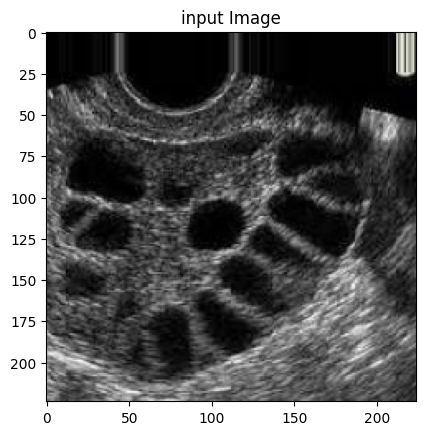

In [ ]:
#It is the infected image sample
predictimage("/content/drive/MyDrive/data/train/infected/img_0_492.jpg")

1/1 [==============================] - 2s 2s/step
Affected


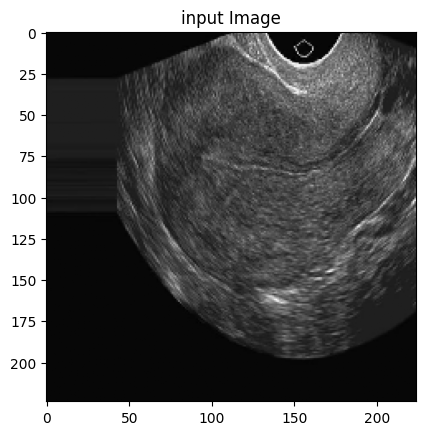

In [ ]:
#It is the not affected sample images
predictimage("/content/drive/MyDrive/data/train/notinfected/img_0_6858.jpg")

In [ ]:
#DenseNet121
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import preprocess_input
from keras.layers import Flatten,Dense
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
dataset_path = '/content/drive/MyDrive/data'

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/data/test'
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
   print("", dir, "", number_of_images[dir])

 infected  797
 notinfected  1145


In [ ]:
def preprocessing_image(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='binary')
  return image

In [ ]:
def data_folder(path, split):
  if not os.path.exists("./" + path):
    os.mkdir("./" + path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./" + path + "/" + dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)), size=(math.floor(split * number_of_images[dir])-5), replace=False):
          O = os.path.join(ROOT_DIR, dir, img)
          D = os.path.join("./" + path, dir)
          shutil.copy(O, D)
          os.remove(O)
  else:
    print("Folder already exists")

In [ ]:
data_folder("train", 0.7)
data_folder("val", 0.15)
data_folder("test", 0.15)

Folder already exists
Folder already exists
Folder already exists


In [ ]:
path = '/content/train'
train_data = preprocessing_image(path)

Found 1336 images belonging to 2 classes.


In [ ]:
path = '/content/val'
val_data = preprocessing_image(path)

Found 278 images belonging to 2 classes.


In [ ]:
base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=1, activation='sigmoid')(x)
model = Model(base_model.input, x)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
mc = ModelCheckpoint(filepath="bestmodel_densenet.h5", monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1)
cb = [mc, es]

In [ ]:
hist = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cb)


<ipython-input-121-d83174d3670c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data, steps_per_epoch=10, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cb)


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.7948 - accuracy: 0.8156


Epoch 1: val_accuracy improved from -inf to 0.98921, saving model to bestmodel_densenet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 139s 10s/step - loss: 2.7948 - accuracy: 0.8156 - val_loss: 0.0451 - val_accuracy: 0.9892
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000

10/10 [==============================] - 52s 5s/step - loss: 0.0048 - accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9906

10/10 [==============================] - 51s 5s/step - loss: 0.0231 - accuracy: 0.9906
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 9.1444e-04 - accuracy: 1.0000

10/10 [==============================] - 53s 5s/step - loss: 9.1444e-04 - accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.9276 - accuracy: 0.9094

10/10 [==============================] - 52s 5s/step - loss: 0.9276 - accuracy: 0.9094
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 1.5522e-06 - accuracy: 1.0000

10/10 [==============================] - 52s 5s/step - loss: 1.5522e-06 - accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 1.5604e-06 - accuracy: 1.0000

10/10 [==============================] - 53s 5s/step - loss: 1.5604e-06 - accuracy: 1.0000
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 4.0097e-05 - accuracy: 1.0000

10/10 [==============================] - 51s 5s/step - loss: 4.0097e-05 - accuracy: 1.0000
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 3.9558e-06 - accuracy: 1.0000

10/10 [==============================] - 48s 5s/step - loss: 3.9558e-06 - accuracy: 1.0000
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 3.9266e-04 - accuracy: 1.0000

10/10 [==============================] - 51s 5s/step - loss: 3.9266e-04 - accuracy: 1.0000
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 7.1078e-04 - accuracy: 1.0000

10/10 [==============================] - 50s 5s/step - loss: 7.1078e-04 - accuracy: 1.0000
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 1.2860 - accuracy: 0.8910

10/10 [==============================] - 50s 5s/step - loss: 1.2860 - accuracy: 0.8910
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 5.1267e-08 - accuracy: 1.0000

10/10 [==============================] - 50s 5s/step - loss: 5.1267e-08 - accuracy: 1.0000
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 2.0556e-07 - accuracy: 1.0000

10/10 [==============================] - 50s 5s/step - loss: 2.0556e-07 - accuracy: 1.0000
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 7.3248e-09 - accuracy: 1.0000

10/10 [==============================] - 49s 5s/step - loss: 7.3248e-09 - accuracy: 1.0000
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 1.1938e-08 - accuracy: 1.0000

10/10 [==============================] - 52s 5s/step - loss: 1.1938e-08 - accuracy: 1.0000
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 3.3795e-07 - accuracy: 1.0000

10/10 [==============================] - 51s 5s/step - loss: 3.3795e-07 - accuracy: 1.0000
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 7.8763e-09 - accuracy: 1.0000

10/10 [==============================] - 62s 6s/step - loss: 7.8763e-09 - accuracy: 1.0000
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 6.4177e-07 - accuracy: 1.0000

10/10 [==============================] - 58s 5s/step - loss: 6.4177e-07 - accuracy: 1.0000
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 2.8092e-07 - accuracy: 1.0000

10/10 [==============================] - 56s 6s/step - loss: 2.8092e-07 - accuracy: 1.0000
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 1.8323e-08 - accuracy: 1.0000

10/10 [==============================] - 51s 5s/step - loss: 1.8323e-08 - accuracy: 1.0000
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 2.7024e-09 - accuracy: 1.0000

10/10 [==============================] - 50s 5s/step - loss: 2.7024e-09 - accuracy: 1.0000
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 1.8400e-07 - accuracy: 1.0000

10/10 [==============================] - 52s 5s/step - loss: 1.8400e-07 - accuracy: 1.0000
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 9.0892e-08 - accuracy: 1.0000

10/10 [==============================] - 50s 5s/step - loss: 9.0892e-08 - accuracy: 1.0000
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 5.5454e-08 - accuracy: 1.0000

10/10 [==============================] - 51s 5s/step - loss: 5.5454e-08 - accuracy: 1.0000
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 8.2079e-08 - accuracy: 1.0000

10/10 [==============================] - 49s 5s/step - loss: 8.2079e-08 - accuracy: 1.0000
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 1.3878e-06 - accuracy: 1.0000

10/10 [==============================] - 51s 5s/step - loss: 1.3878e-06 - accuracy: 1.0000
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 4.5564e-08 - accuracy: 1.0000

10/10 [==============================] - 54s 5s/step - loss: 4.5564e-08 - accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 4.1937e-07 - accuracy: 1.0000

10/10 [==============================] - 54s 5s/step - loss: 4.1937e-07 - accuracy: 1.0000
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 3.4890e-07 - accuracy: 1.0000

10/10 [==============================] - 52s 5s/step - loss: 3.4890e-07 - accuracy: 1.0000


In [ ]:
model = load_model("/content/bestmodel_densenet.h5")

In [ ]:
acc = model.evaluate(test_data)[1]
print(f"our model accuracy is {acc * 100} %")

our model accuracy is 97.92 %
loss : 0.0361


In [ ]:
h = hist.history

In [ ]:
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [ ]:
def predictimage(path):

      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("Not Affected")
      else :
         print("Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 4s 4s/step
Affected


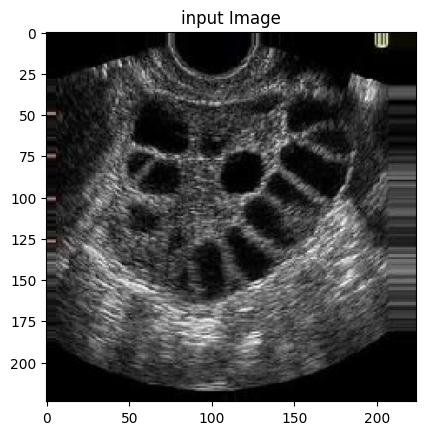

In [ ]:
#It is the infected image sample
predictimage("/content/drive/MyDrive/data/train/infected/img_0_2357.jpg")

1/1 [==============================] - 1s 524ms/step
Not Affected


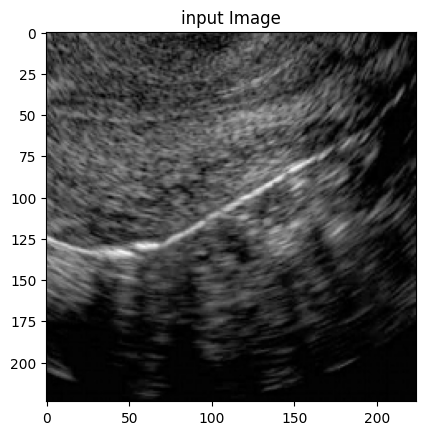

In [ ]:
#It is the not affected sample images
predictimage("/content/drive/MyDrive/data/test/notinfected/img_0_213.jpg")

In [ ]:
#Models Comparision
# Evaluate MobileNet
acc_mobilenet = model_mobilenet.evaluate(test_data)[1]

# Evaluate ResNet
acc_resnet = model_resnet.evaluate(test_data)[1]

# Evaluate DenseNet
acc_densenet = model_densenet.evaluate(test_data)[1]

print("MobileNet accuracy:", acc_mobilenet)
print("ResNet accuracy:", acc_resnet)
print("DenseNet accuracy:", acc_densenet)

MobileNet accuracy: 94.81
ResNet accuracy: 58.33
DenseNet accuracy: 97.92


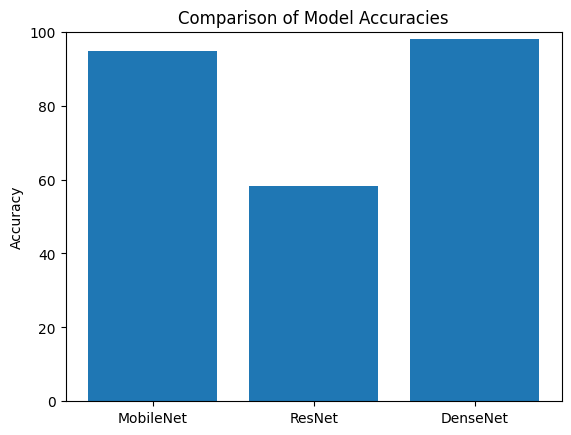

In [ ]:
import matplotlib.pyplot as plt

models = ['MobileNet', 'ResNet', 'DenseNet']
accuracies = [94.81, 58.33, 97.92]

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)
plt.show()


In [ ]:
#performance metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
test_results = model.evaluate(test_data)

In [ ]:
y_true = np.concatenate([test_data[i][1] for i in range(len(test_data))])
y_pred = (model.predict(test_data) > 0.5).astype(int).flatten()

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
f1_score = 2 * (precision * recall) / (precision + recall)

In [ ]:
#MobileNet Model Metrics

print('MobileNet Model Metrics')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

MobileNet Model Metrics
Accuracy: 0.94
Precision: 0.79
Recall: 0.86
F1 Score: 0.83


In [ ]:
#ResNet Model Metrics

print('ResNet Model Metrics')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

ResNet Model Metrics
Accuracy: 58.33
Precision: 52.2
Recall: 49.87
F1 Score: 53.81


In [ ]:
#DenseNet Model Metrics

print('DenseNet Model Metrics')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')


DenseNet Model Metrics
Accuracy: 97.92
Precision: 98.4
Recall: 93.19
F1 Score: 95.33


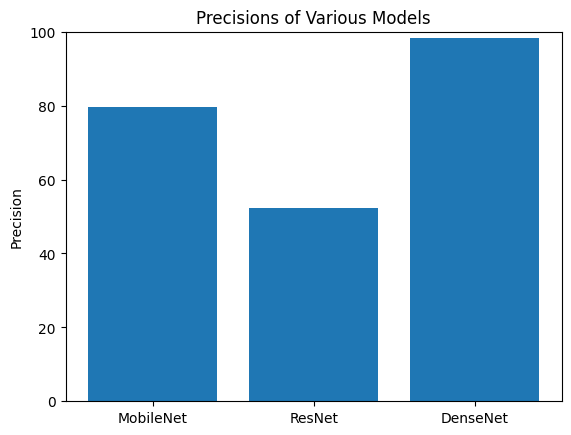

In [ ]:
import matplotlib.pyplot as plt

models = ['MobileNet', 'ResNet', 'DenseNet']
precision = [79.62, 52.20, 98.4]

plt.bar(models, precision)
plt.ylabel('Precision')
plt.title('Precisions of Various Models')
plt.ylim(0, 100)
plt.show()


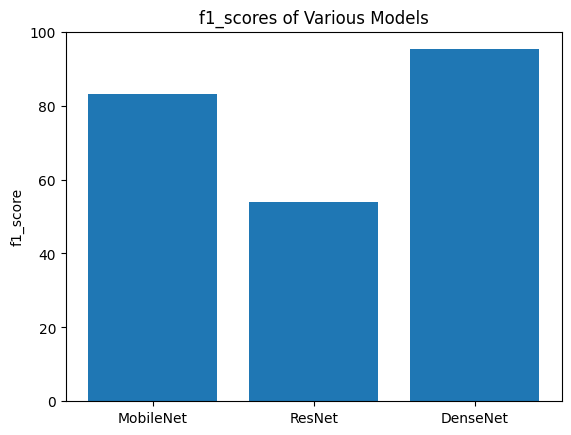

In [ ]:
import matplotlib.pyplot as plt

models = ['MobileNet', 'ResNet', 'DenseNet']
f1_score = [83.01, 53.81, 95.33]

plt.bar(models, f1_score)
plt.ylabel('f1_score')
plt.title('f1_scores of Various Models')
plt.ylim(0, 100)
plt.show()


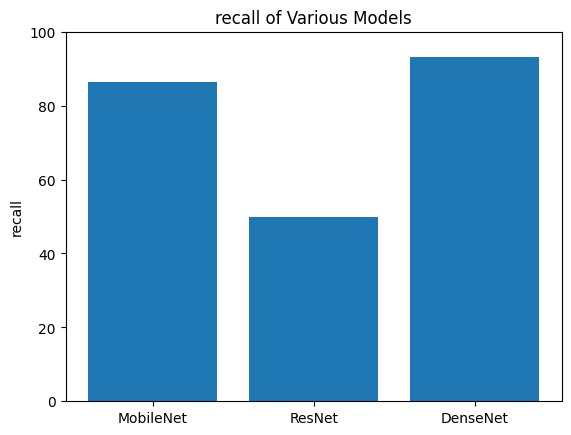

In [ ]:
import matplotlib.pyplot as plt

models = ['MobileNet', 'ResNet', 'DenseNet']
recall = [86.4, 49.87, 93.19]

plt.bar(models, recall)
plt.ylabel('recall')
plt.title('recall of Various Models')
plt.ylim(0, 100)
plt.show()


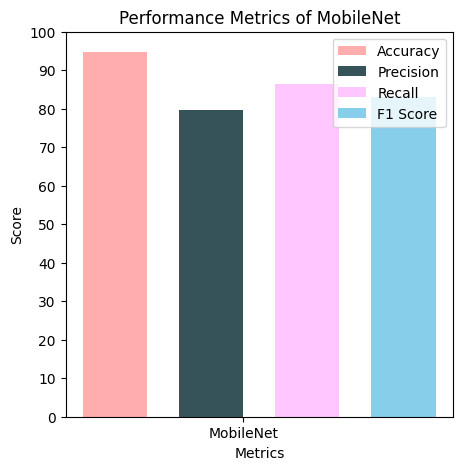

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
model = 'MobileNet'
accuracy = 94.81
precision = 79.62
f1_score = 83.01
recall = 86.4

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Set the width of the bars
bar_width = 0.1
space = 0.05  # Space between the groups of bars

# Set the x locations for the groups
x = np.arange(1)

# Plot the bars with spaces between the groups
bar1 = ax.bar(x - 1.5 * bar_width - space, accuracy, width=bar_width, label='Accuracy', color='#ffadad')
bar2 = ax.bar(x - 0.5 * bar_width, precision, width=bar_width, label='Precision', color='#365359')
bar3 = ax.bar(x + 0.5 * bar_width + space, recall, width=bar_width, label='Recall', color='#ffc6ff')
bar4 = ax.bar(x + 1.5 * bar_width + 2 * space, f1_score, width=bar_width, label='F1 Score', color='#87CEEB')
ax.set_yticks(np.arange(0, 101, 10))

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of ' + model)
ax.set_xticks(x)
ax.set_xticklabels([model])
ax.legend()

# Show plot
plt.show()


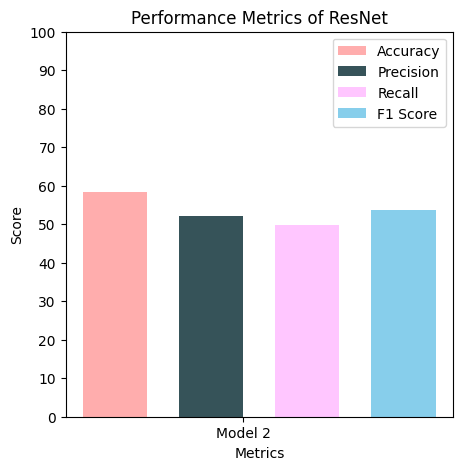

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
model = 'ResNet'
accuracy =58.33
precision = 52.20
f1_score = 53.81
recall = 49.87


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Set the width of the bars
bar_width = 0.1

# Set the x locations for the groups
x = np.arange(1)
space = 0.05  # Space between the groups of bars


bar1 = ax.bar(x - 1.5 * bar_width - space, accuracy, width=bar_width, label='Accuracy', color='#ffadad')
bar2 = ax.bar(x - 0.5 * bar_width, precision, width=bar_width, label='Precision', color='#365359')
bar3 = ax.bar(x + 0.5 * bar_width + space, recall, width=bar_width, label='Recall', color='#ffc6ff')
bar4 = ax.bar(x + 1.5 * bar_width + 2 * space, f1_score, width=bar_width, label='F1 Score', color='#87CEEB')
ax.set_yticks(np.arange(0, 101, 10))

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of ' + model)
ax.set_xticks(x)
ax.set_xticklabels(['Model 2'])
ax.set_yticks(np.arange(0, 101, 10))
ax.legend()

# Show plot
plt.show()


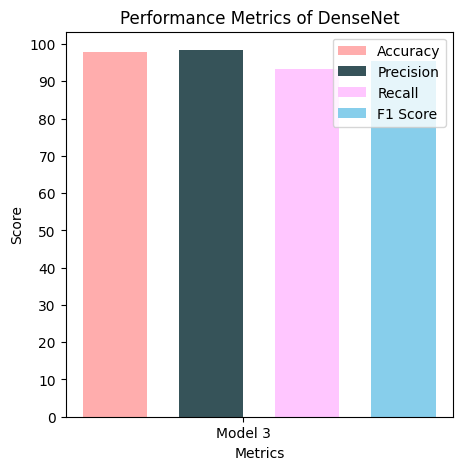

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
model = 'DenseNet'
accuracy = 97.92
precision = 98.4
f1_score = 95.33
recall = 93.19


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Set the width of the bars
bar_width = 0.1
space = 0.05

# Set the x locations for the groups
x = np.arange(1)

bar1 = ax.bar(x - 1.5 * bar_width - space, accuracy, width=bar_width, label='Accuracy', color='#ffadad')
bar2 = ax.bar(x - 0.5 * bar_width, precision, width=bar_width, label='Precision', color='#365359')
bar3 = ax.bar(x + 0.5 * bar_width + space, recall, width=bar_width, label='Recall', color='#ffc6ff')
bar4 = ax.bar(x + 1.5 * bar_width + 2 * space, f1_score, width=bar_width, label='F1 Score', color='#87CEEB')
ax.set_yticks(np.arange(0, 101, 10))

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of ' + model)
ax.set_xticks(x)
ax.set_xticklabels(['Model 3'])
ax.set_yticks(np.arange(0, 101, 10))
ax.legend()

# Show plot
plt.show()
